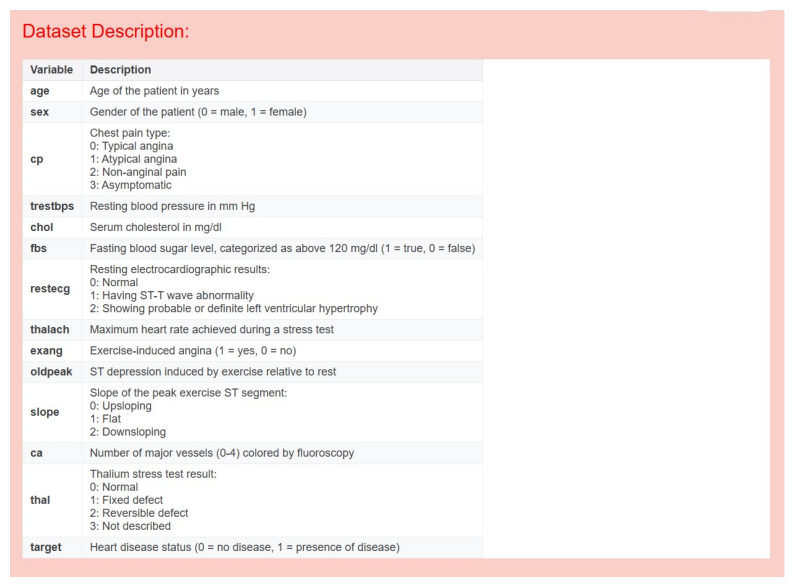

In [28]:
from PIL import Image

img = Image.open('/content/WhatsApp Image 2024-11-13 at 07.59.47_3de7e901.jpg')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

#Importing librarires

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Read Dataset


In [3]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#Dataset Overview

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
print("Shape of the dataset :",df.shape)

Shape of the dataset : (303, 14)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

df[features_to_convert] = df[features_to_convert].astype('object')

df.describe(include='object').T

,count,unique,top,freq
sex,303,2,1,207
cp,303,4,0,143
fbs,303,2,0,258
restecg,303,3,1,152
exang,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thal,303,4,2,166
target,303,2,1,165


#Data Preprocessing

In [10]:
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal No. of missng values :",df.isnull().sum().sum())

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Total No. of missng values : 0


In [11]:
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)
else:
    print("No duplicate columns found.")

No duplicate columns found.


In [12]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

print("Outliers Count:")
print(outliers_count_specified)

Outliers Count:
age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64


#Exploratory Data Analysis

Distribution of the target variable

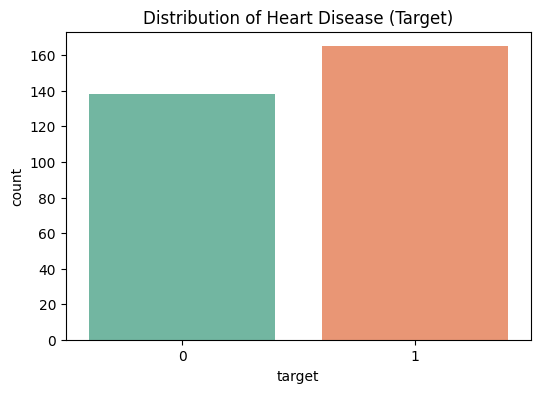

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, hue='target', palette='Set2', legend=False)
plt.title('Distribution of Heart Disease (Target)')
plt.show()

Correlation matrix

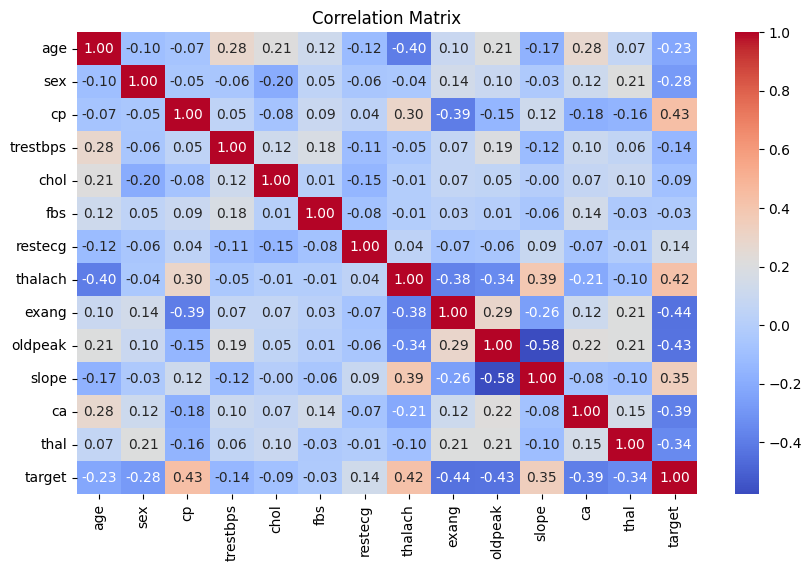

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

Distribution of 'age', 'chol', 'trestbps'


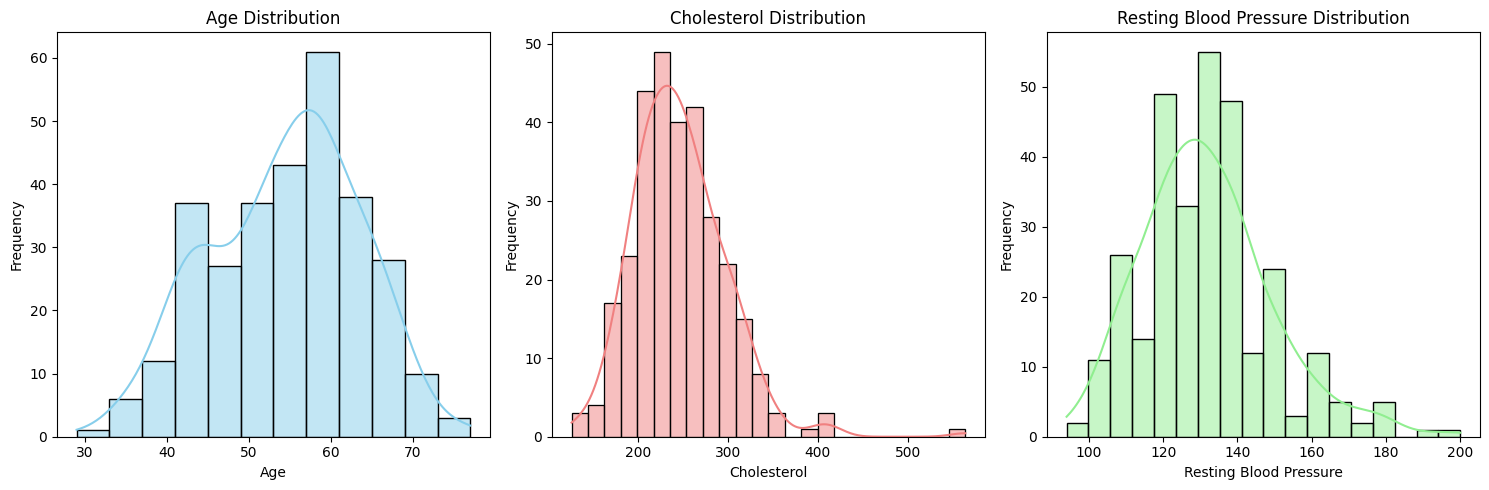

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')


plt.subplot(1, 3, 2)
sns.histplot(df['chol'], kde=True, color='lightcoral')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['trestbps'], kde=True, color='lightgreen')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Age vs Target

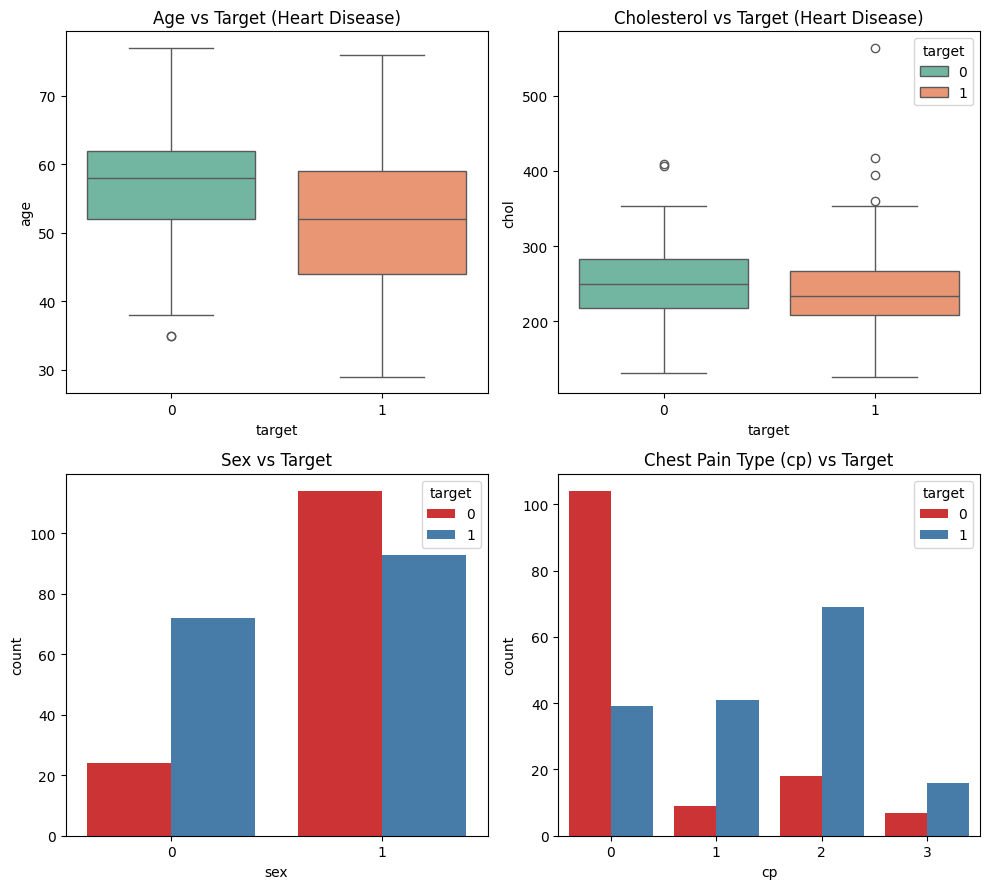

In [16]:
plt.figure(figsize=(10, 9))
plt.subplot(221)
sns.boxplot(x='target', y='age', data=df, hue='target', palette='Set2', legend=False)
plt.title('Age vs Target (Heart Disease)')

plt.subplot(222)
sns.boxplot(x='target', y='chol', data=df, hue='target', palette='Set2', dodge=False)
plt.title('Cholesterol vs Target (Heart Disease)')

plt.subplot(223)
sns.countplot(x='sex', hue='target', data=df, palette='Set1')
plt.title('Sex vs Target')

plt.subplot(224)
sns.countplot(x='cp', hue='target', data=df, palette='Set1')
plt.title('Chest Pain Type (cp) vs Target')

plt.tight_layout()
plt.show()

-> Cholestrol Levels by Gender and Heart Disease Presence

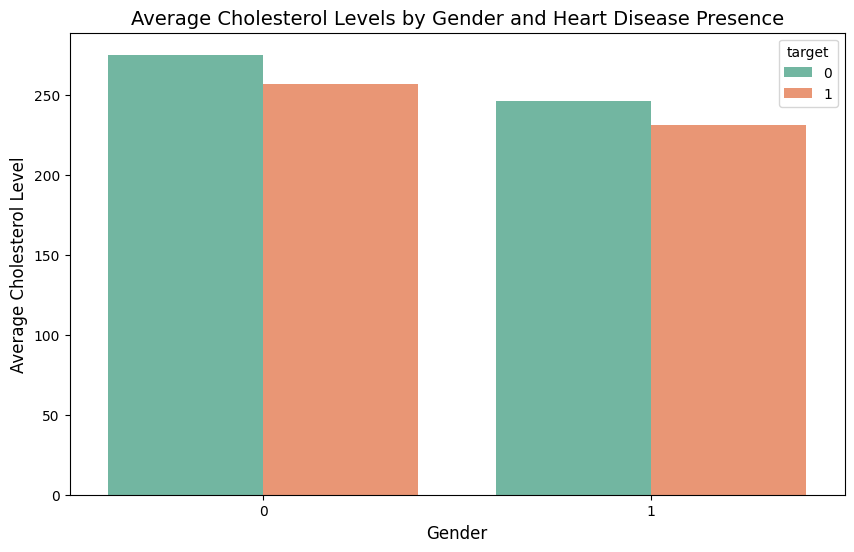

In [17]:
mean_chol = df.groupby(['sex', 'target'])['chol'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='chol', hue='target', data=mean_chol, palette='Set2')

plt.title('Average Cholesterol Levels by Gender and Heart Disease Presence', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Cholesterol Level', fontsize=12)

plt.show()

#Features & Outcome

-> Age Group with Maximum Heart Disease Prevalence

In [18]:
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-40', '40-50', '50-60', '60-70', '70-80'])

age_group_counts = df.groupby('age_group', observed=True)['target'].mean() * 100
max_age_group = age_group_counts.idxmax()
max_prevalence = age_group_counts.max()

print(f"Age Group with Highest Heart Disease Prevalence: {max_age_group} with {max_prevalence:.2f}%")

Age Group with Highest Heart Disease Prevalence: 70-80 with 83.33%


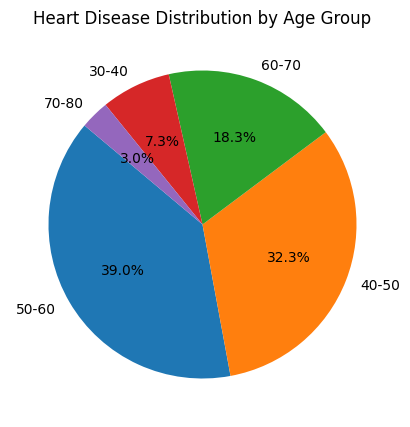

In [19]:
age_group_heart_disease = df[df['target'] == 1]['age_group'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(age_group_heart_disease, labels=age_group_heart_disease.index, autopct='%1.1f%%', startangle=140)
plt.title('Heart Disease Distribution by Age Group')
plt.show()

 -> Gender-wise Heart Disease Prevalence

In [20]:
gender_heart_disease = df.groupby('sex')['target'].mean() * 100

print("Heart Disease Prevalence by Gender:")
print(f"Male: {gender_heart_disease[0]:.2f}%")
print(f"Female: {gender_heart_disease[1]:.2f}%")

Heart Disease Prevalence by Gender:
Male: 75.00%
Female: 44.93%


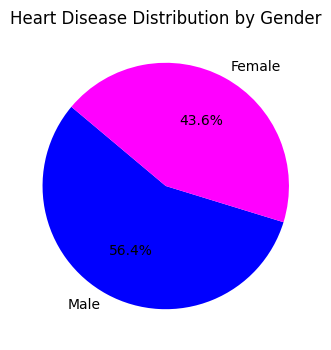

In [21]:
gender_heart_disease = df[df['target'] == 1]['sex'].value_counts(normalize=True) * 100

gender_labels = ['Male', 'Female']

plt.figure(figsize=(4, 4))
colors = ['blue', 'magenta']
plt.pie(gender_heart_disease, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Heart Disease Distribution by Gender')
plt.show()

-> Heart Disease Probability by Chest Pain Type

In [22]:
cp_heart_disease = df.groupby('cp')['target'].mean() * 100

print("Heart Disease Probability by Chest Pain Type:")
for cp_type, probability in cp_heart_disease.items():
    print(f"  Chest Pain Type {cp_type}: {probability:.2f}%")

Heart Disease Probability by Chest Pain Type:
  Chest Pain Type 0: 27.27%
  Chest Pain Type 1: 82.00%
  Chest Pain Type 2: 79.31%
  Chest Pain Type 3: 69.57%


-> Average Cholesterol Level for Patients with and without Heart Disease

In [23]:
avg_chol_by_target = df.groupby('target')['chol'].mean()

print("Average Cholesterol Levels:")
print(f"  No Heart Disease: {avg_chol_by_target[0]:.2f} mg/dL")
print(f"  Heart Disease: {avg_chol_by_target[1]:.2f} mg/dL")

if avg_chol_by_target[1] > avg_chol_by_target[0]:
    print("Note: Cholesterol levels are higher for individuals with heart disease.")
else:
    print("Note: Cholesterol levels are not higher for individuals with heart disease.")

Average Cholesterol Levels:
  No Heart Disease: 251.09 mg/dL
  Heart Disease: 242.23 mg/dL
Note: Cholesterol levels are not higher for individuals with heart disease.


 -> Average Maximum Heart Rate (thalach) for Patients with and without Heart Disease

In [24]:
avg_thalach_by_target = df.groupby('target')['thalach'].mean()

print("Average Maximum Heart Rate Achieved:")
print(f"  No Heart Disease: {avg_thalach_by_target[0]:.2f} bpm")
print(f"  Heart Disease: {avg_thalach_by_target[1]:.2f} bpm")

Average Maximum Heart Rate Achieved:
  No Heart Disease: 139.10 bpm
  Heart Disease: 158.47 bpm


In [25]:
avg_thalach_by_target_gender = df.groupby(['target', 'sex'])['thalach'].mean().unstack()

print("Average Maximum Heart Rate Achieved (Gender-wise):")
print(f"  No Heart Disease (Male): {avg_thalach_by_target_gender.loc[0, 0]:.2f} bpm")
print(f"  No Heart Disease (Female): {avg_thalach_by_target_gender.loc[0, 1]:.2f} bpm")
print(f"  Heart Disease (Male): {avg_thalach_by_target_gender.loc[1, 0]:.2f} bpm")
print(f"  Heart Disease (Female): {avg_thalach_by_target_gender.loc[1, 1]:.2f} bpm")

Average Maximum Heart Rate Achieved (Gender-wise):
  No Heart Disease (Male): 142.42 bpm
  No Heart Disease (Female): 138.40 bpm
  Heart Disease (Male): 154.03 bpm
  Heart Disease (Female): 161.90 bpm


-> Heart disease probability by fasting blood sugar

In [26]:
probability_fbs = df.groupby('fbs')['target'].mean()

print("Heart Disease Probability by Fasting Blood Sugar:")
print(f"  Fasting Blood Sugar <= 120 mg/dl: {probability_fbs[0] * 100:.2f}%")
print(f"  Fasting Blood Sugar > 120 mg/dl: {probability_fbs[1] * 100:.2f}%")

Heart Disease Probability by Fasting Blood Sugar:
  Fasting Blood Sugar <= 120 mg/dl: 55.04%
  Fasting Blood Sugar > 120 mg/dl: 51.11%


-> Best conditions for not having heart disease

In [27]:
no_heart_disease = df[df['target'] == 0]

print("Most Frequent Values for Individuals Without Heart Disease:")
print(no_heart_disease.mode().iloc[0])

Most Frequent Values for Individuals Without Heart Disease:
age           58.0
sex              1
cp               0
trestbps     140.0
chol           212
fbs              0
restecg          0
thalach      132.0
exang            1
oldpeak        0.0
slope            1
ca               0
thal             3
target           0
age_group    50-60
Name: 0, dtype: object
